In [7]:
%matplotlib inline
import numpy as np                 # числовые данные
import pandas as pd                # таблицы

import matplotlib.pyplot as plt    # графики
import seaborn as sns              # продвинутые графики

from scipy.stats import norm       # нормальное распределение
from scipy import stats            # стандартизированная оценка

import warnings               
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("waterquality.csv")
df

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...
529,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [9]:
# удаляем ненужный первый столбец при помощи drop, 
# параметр axis отвечает за то, где мы ищем элемент для удаления - в столбце (axis=1)
df = df.drop('STATION CODE', axis=1) 

In [10]:
df.info()
# выводим информацию о нашем Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOCATIONS            534 non-null    object 
 1   STATE                534 non-null    object 
 2   TEMP                 529 non-null    float64
 3   DO                   532 non-null    float64
 4   pH                   534 non-null    float64
 5   CONDUCTIVITY         504 non-null    float64
 6   BOD                  528 non-null    float64
 7   NITRATE_N_NITRITE_N  532 non-null    float64
 8   FECAL_COLIFORM       452 non-null    float64
 9   TOTAL_COLIFORM       495 non-null    float64
dtypes: float64(8), object(2)
memory usage: 41.8+ KB


In [11]:
# пропуски: еще при выводе метода info можно увидеть, что присутствуют пропуски. Можем проверить где они есть:
df.isna().sum()
# С помощью метода .isna() находим пропушенные значения. 
# .sum() суммирует общее количество пропусков по каждому признаку. 

LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

<Axes: >

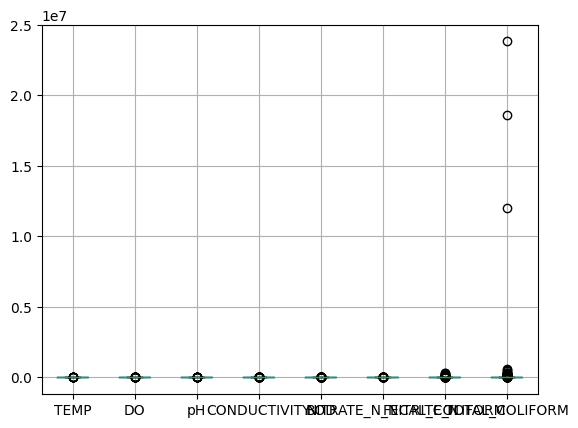

In [12]:
df.boxplot(column=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])

In [13]:
# ВЫБРОСЫ
# Сохраним в новой переменной числовые признаки, в которых могут содержаться выбросы
ALL = ['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']

# Рассчитаем межквартильный размах для каждого столбца
Q1 = df[ALL].quantile(0.25)
Q3 = df[ALL].quantile(0.75)
IQR = Q3 - Q1

# Определим границы выбросов для каждого столбца
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Найдем выбросы в каждом столбце
outliers = (df[ALL] < lower_bound) | (df[ALL] > upper_bound)
outliers_1 = outliers.sum() # Находим общее количество выбросов для каждого признака
tt = outliers_1.sum() # Общее количество выбросов в DataFrame

print("Выбросы:")
print(outliers_1)
print(f'Всего выбросов: {tt}')

Выбросы:
TEMP                    9
DO                     22
pH                     14
CONDUCTIVITY           44
BOD                    61
NITRATE_N_NITRITE_N    41
FECAL_COLIFORM         60
TOTAL_COLIFORM         71
dtype: int64
Всего выбросов: 322


In [14]:
# Функция для удаления выбросов по межквартильному размаху
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]
    return data

# Удаляем выбросы
columns_to_check = ['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']
df_no_outliers = remove_outliers(df, columns_to_check)

# Проверяем на пропущенные значения и удаляем строки с пропусками
df_no_outliers = df_no_outliers.dropna()

# Выводим количество объектов в новом датафрейме
print(f"Количество объектов после удаления выбросов и пропущенных значений: {df_no_outliers.shape[0]}")

Количество объектов после удаления выбросов и пропущенных значений: 262


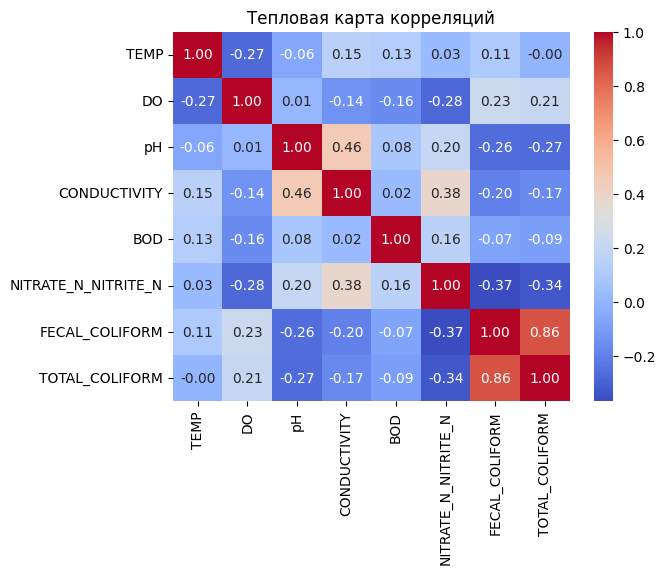

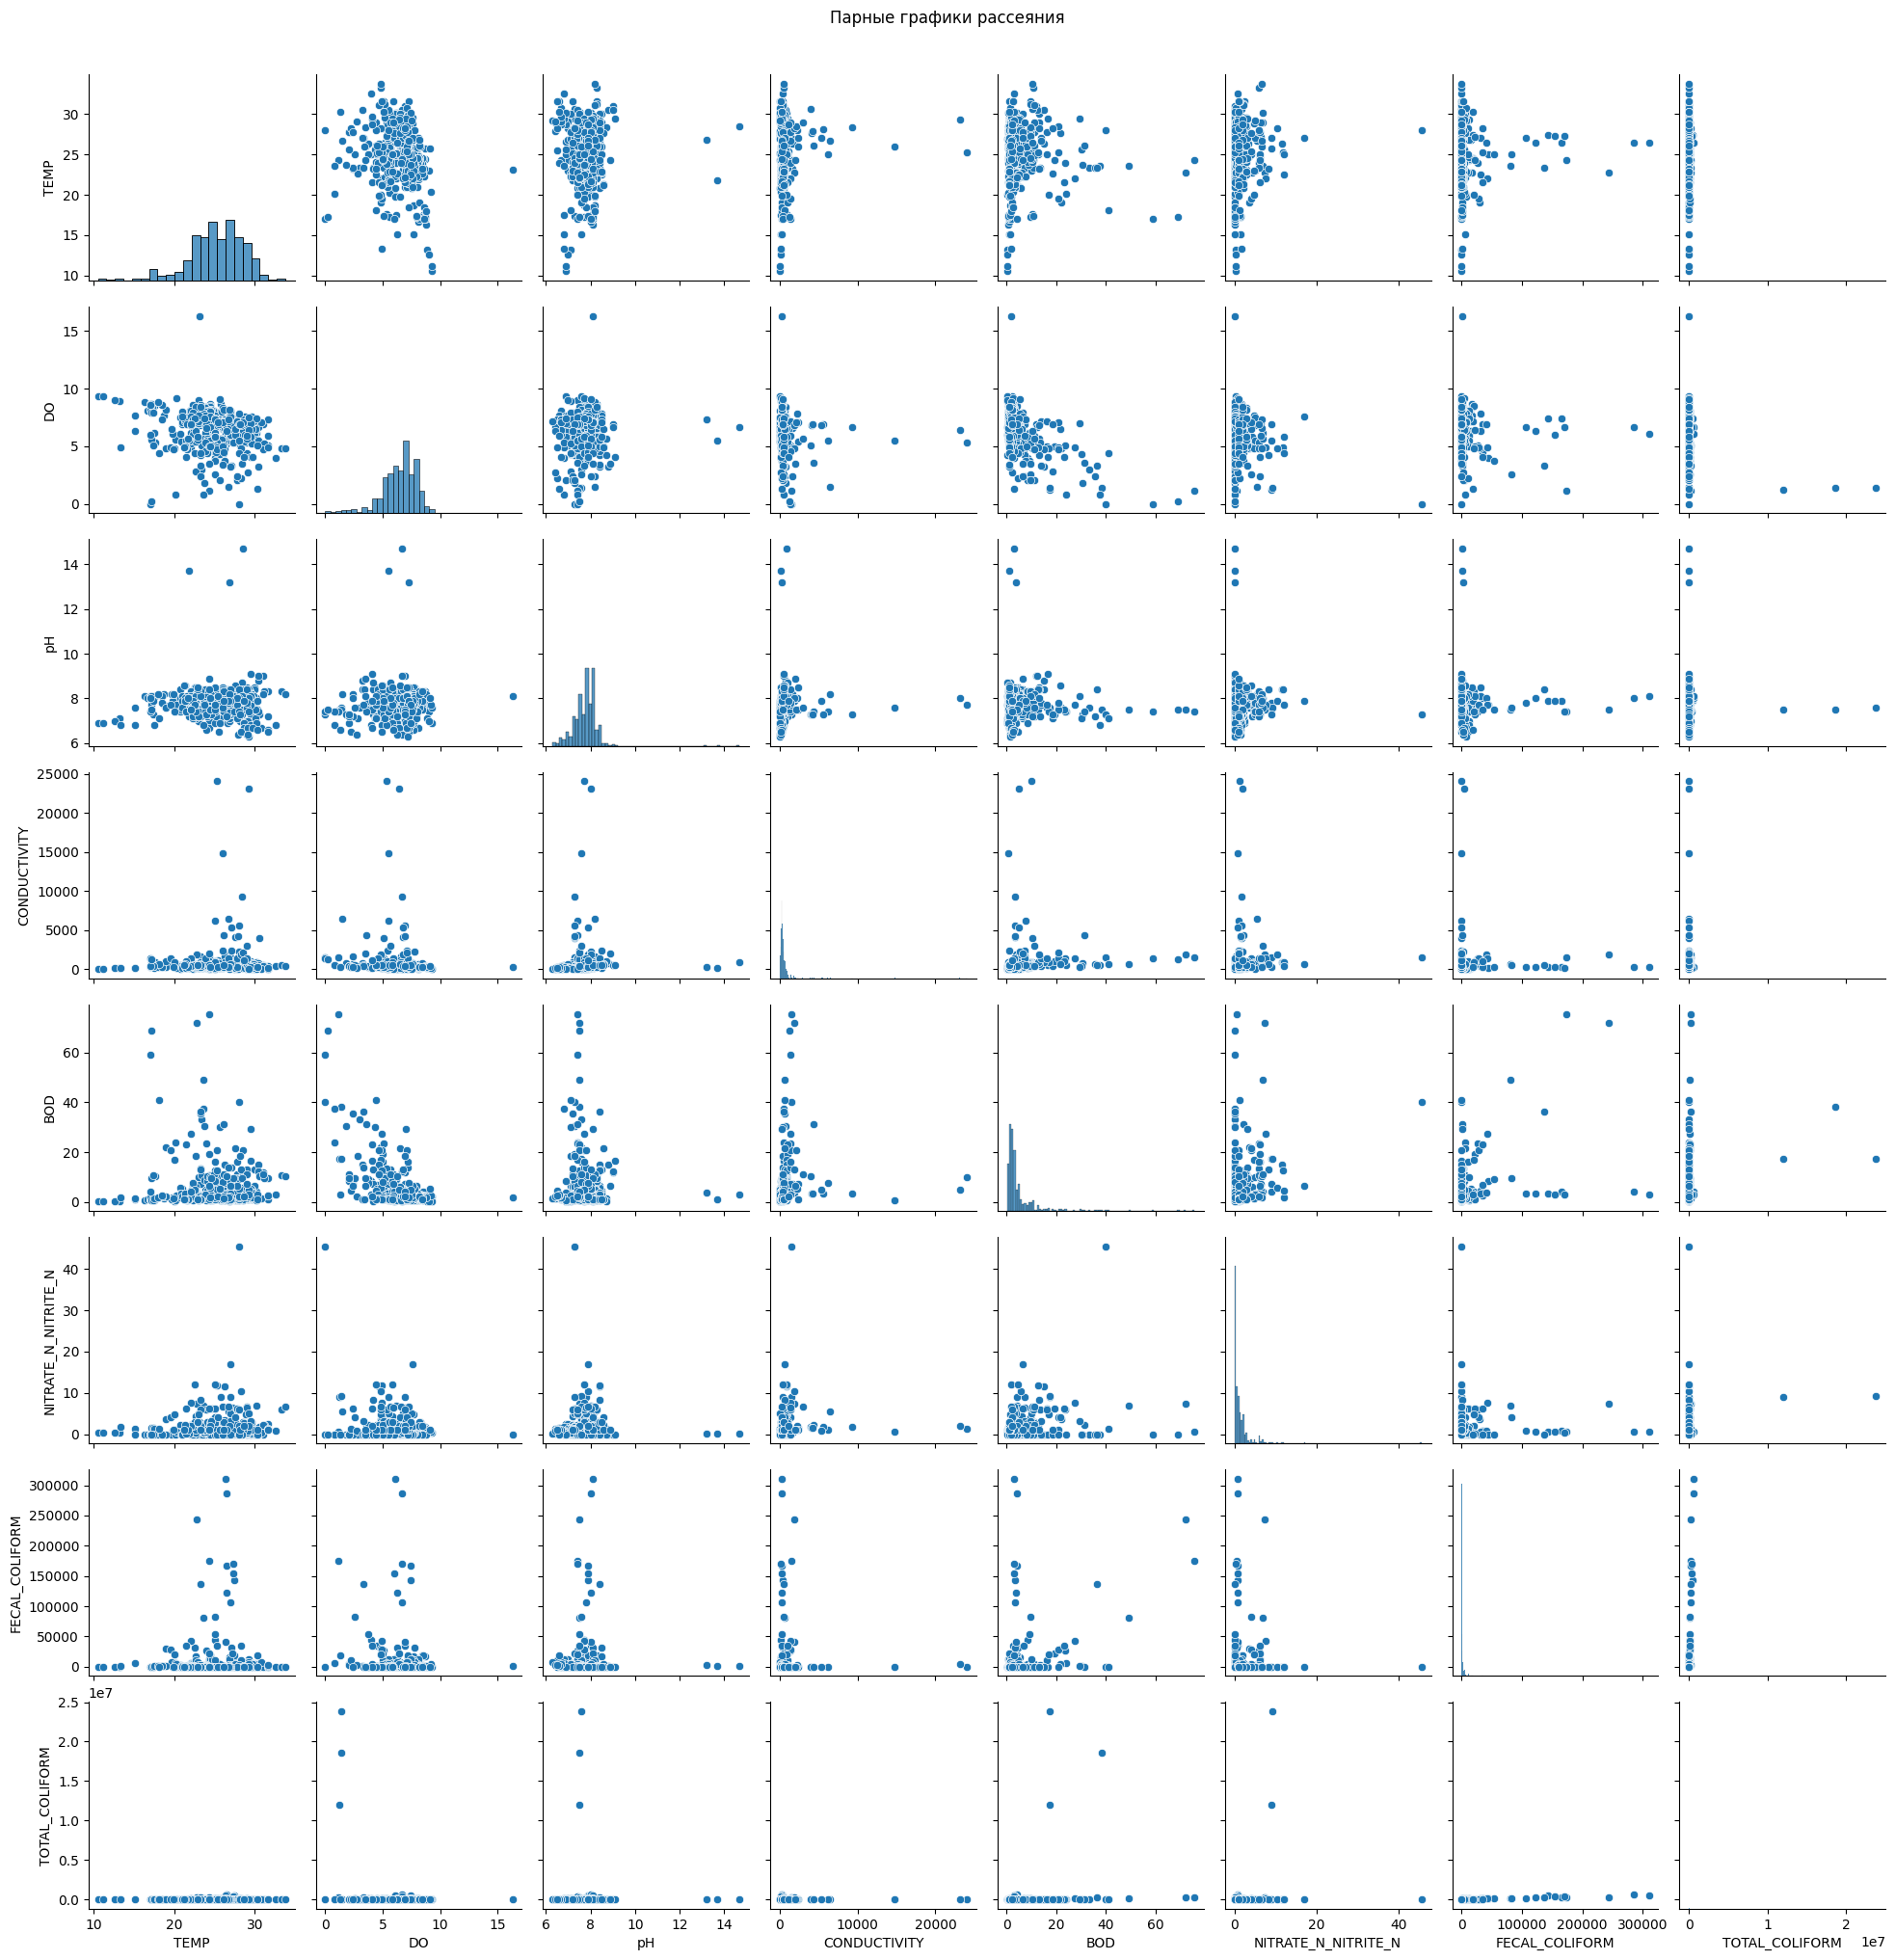

In [15]:
# Тепловая карта для корреляционной матрицы
correlation_matrix = df_no_outliers[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Тепловая карта корреляций')
plt.show()

# Парные графики рассеяния
sns.pairplot(df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']])
plt.suptitle('Парные графики рассеяния', y=1.02)
plt.show()

In [16]:
rows, colums = df_no_outliers.shape
print("Количество строк", rows)
print("Количество столбцов", colums)

Количество строк 262
Количество столбцов 10


In [17]:
#Количественные
df_no_outliers[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']].describe()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,25.237405,6.795420,7.817557,381.538168,2.575573,0.730611,664.122137,1563.515267
std,3.006426,1.064067,0.381262,200.757713,1.481590,0.807955,922.643155,1790.499407
min,17.000000,3.700000,6.700000,39.000000,0.300000,0.000000,2.000000,4.000000
25%,23.000000,6.000000,7.600000,263.500000,1.400000,0.100000,12.000000,82.000000
50%,25.100000,6.850000,7.900000,320.500000,2.200000,0.400000,199.500000,1105.000000
75%,27.475000,7.675000,8.100000,468.750000,3.300000,1.045000,980.250000,2448.000000
max,32.600000,9.200000,8.600000,1017.000000,7.600000,3.000000,4525.000000,7258.000000


In [18]:
#Порядковые
# найдем моду для порядковых переменных
list1 = []
columns = ['TEMP']
for i in columns:
    list1.append([i, df[i].max(), df[i].mode()[0]])

data = pd.DataFrame(list1, columns=['column', 'max', 'mode']).set_index('column').T
data

column,TEMP
max,33.8
mode,27.0


<Axes: >

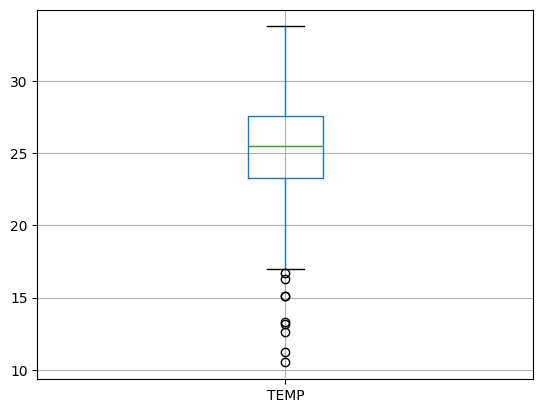

In [19]:
# построим boxplot для порядковых
df.boxplot(column=['TEMP'])

In [20]:
#Номинальные
# применим функцию describe к номинальным переменным
df_no_outliers[['LOCATIONS','STATE']].describe()

,LOCATIONS,STATE
count,262,262
unique,262,12
top,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",BIHAR
freq,1,48


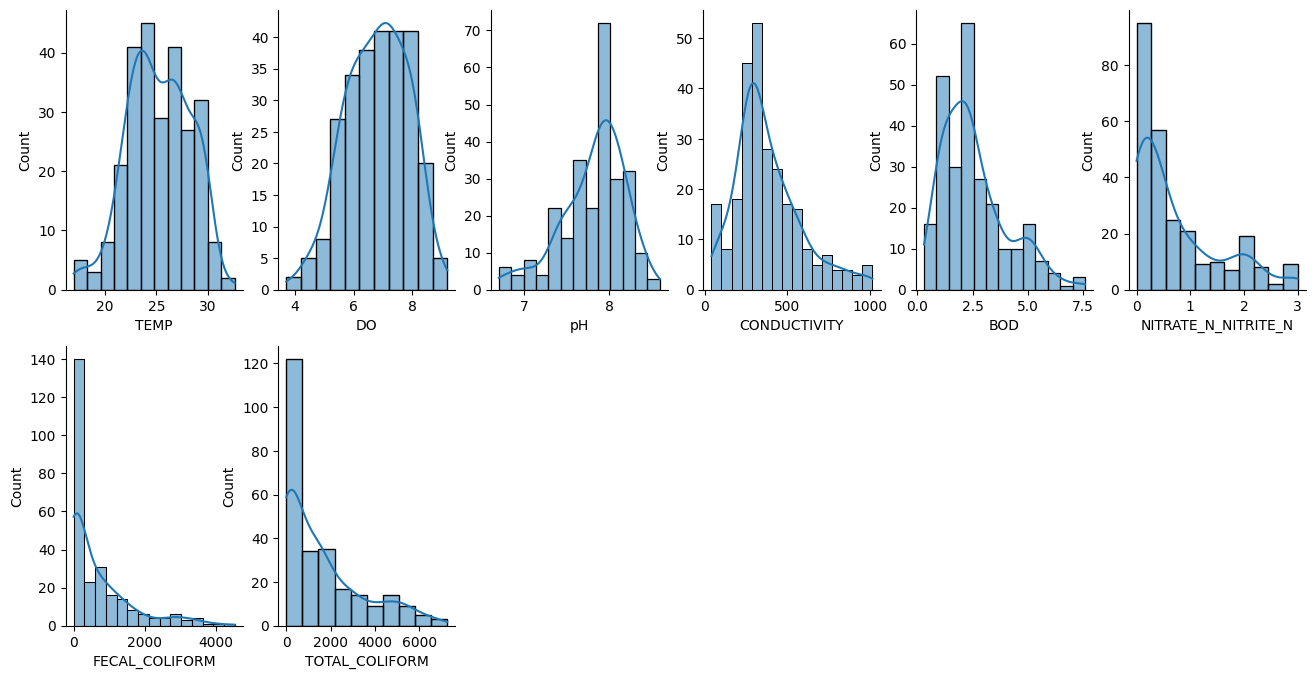

In [21]:
# Количественные переменныe
# построим гистограммы для к-венных переменных
plt.figure(figsize=(16, 8))
for i, k in enumerate(['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM']):
    plt.subplot(261 + i)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    sns.histplot(data=df_no_outliers, x=k,kde=True) 

<Axes: >

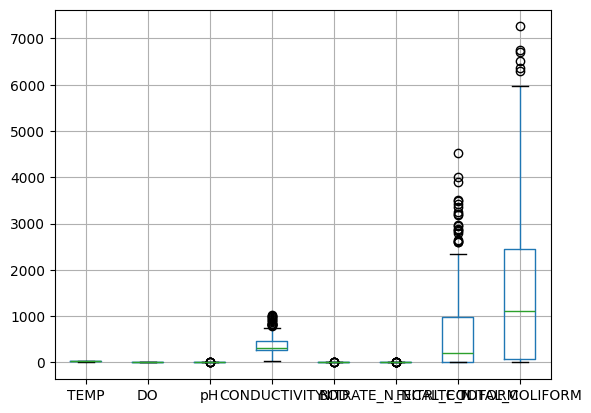

In [22]:
# построим ящики с усами для к-венных переменных
df_no_outliers.boxplot(column=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Обработка категориальных признаков
df = pd.get_dummies(df_no_outliers)

# Предполагаем, что столбец 'FECAL_COLIFORM' является целевым для определения загрязнения
# В реальном случае вам нужно будет определить, какой столбец является целевым
df['is_polluted'] = df['FECAL_COLIFORM'].apply(lambda x: 1 if x > 5 else 0)

# Разделение данных на признаки и целевую переменную
X = df.drop(['FECAL_COLIFORM', 'is_polluted'], axis=1)
y = df['is_polluted']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление метрик
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.90      0.96      0.92        45

    accuracy                           0.87        53
   macro avg       0.75      0.67      0.69        53
weighted avg       0.85      0.87      0.85        53



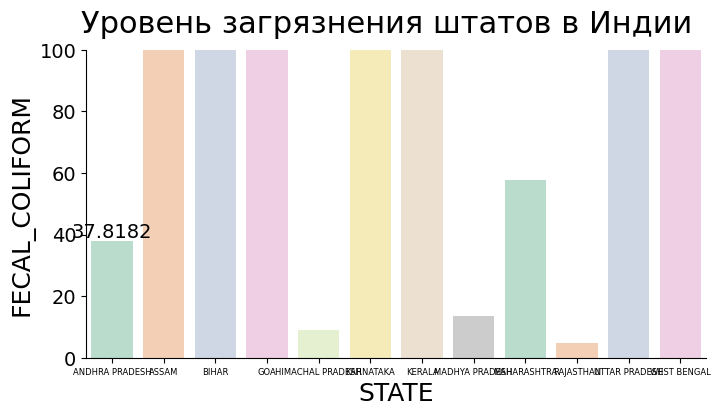

In [56]:
# Вычисление среднего значения FECAL_COLIFORM для каждого STATE
state_mean_fecal_coliform = df_no_outliers.groupby('STATE')['FECAL_COLIFORM'].mean().reset_index()

# Отрисовка графика
plt.figure(figsize=[8, 4])
plt.suptitle('Уровень загрязнения штатов в Индии', fontsize=22)

plt.xticks(fontsize=6)
plt.xlabel('STATE', fontsize=18)
plt.yticks(fontsize=14)
plt.ylabel('FECAL_COLIFORM', fontsize=18)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

ax = sns.barplot(x='STATE', y='FECAL_COLIFORM', data=state_mean_fecal_coliform, palette='Pastel2', ci=None)
ax.set_ylim([0, 100]) 
ax.bar_label(ax.containers[0], fontsize=14)

plt.show()